In [719]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [720]:
from datasist.structdata import detect_outliers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler

In [721]:
warnings.filterwarnings('ignore')

In [722]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'Paired' , font_scale = 1.1 ,
             rc = {'figure.figsize' : (8 , 4)}) 

In [723]:
%matplotlib inline 

In [724]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [726]:
df.isnull().mean()*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [727]:
col_dropna = ['education' , 'cigsPerDay' , 'BPMeds' , 'totChol' , 'BMI' , 'heartRate']

In [728]:
df.duplicated().sum()

0

In [729]:
df.dropna(subset = col_dropna , inplace = True , axis = 0 )

In [730]:
df.reset_index(inplace = True , drop = True)

<AxesSubplot:xlabel='male', ylabel='count'>

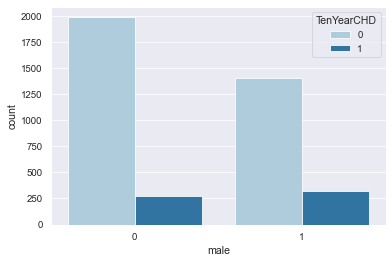

In [731]:
sns.countplot(data = df , x = 'male' , hue = 'TenYearCHD')

In [732]:
df['age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
age,3987.0,49.478806,8.531588,32.0,42.0,49.0,56.0,70.0


<AxesSubplot:xlabel='age', ylabel='Density'>

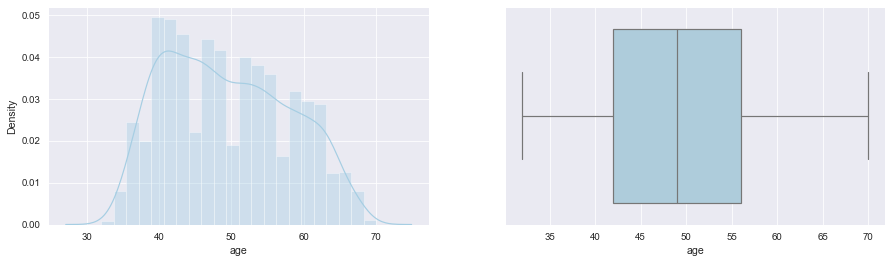

In [733]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 4))
sns.boxplot(df['age'] , ax = axis[1])
sns.distplot(df['age'] , ax = axis[0])

In [734]:
df['education'].unique()

array([4., 2., 1., 3.])

<AxesSubplot:xlabel='education', ylabel='count'>

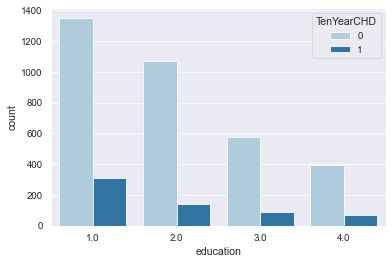

In [735]:
sns.countplot(df['education'] , hue = df['TenYearCHD'])

In [736]:
df['currentSmoker'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

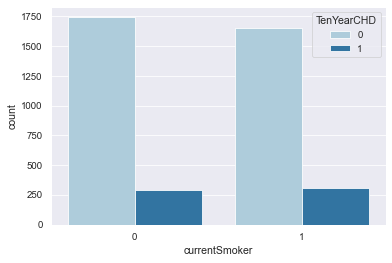

In [737]:
sns.countplot(df['currentSmoker'] , hue = df['TenYearCHD'])

In [738]:
df['cigsPerDay'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
cigsPerDay,3987.0,9.020316,11.914558,0.0,0.0,0.0,20.0,70.0


In [739]:
df['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., 12.,  4., 18., 60., 25., 14., 45.,  8., 50., 13., 11.,  7.,
        6., 38., 29., 17., 16., 19., 70.])

<AxesSubplot:xlabel='cigsPerDay'>

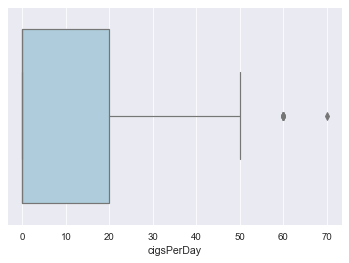

In [740]:
sns.boxplot(df['cigsPerDay'])

In [741]:
df.drop(df[df['cigsPerDay'] > 50].index , axis = 0 , inplace = True)

In [742]:
df['BPMeds'].unique()

array([0., 1.])

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

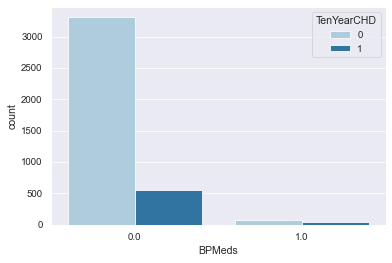

In [743]:
sns.countplot(df['BPMeds'] , hue = df['TenYearCHD'])

In [744]:
df.drop(['BPMeds'] , axis = 1 ,inplace = True )

In [745]:
df['prevalentStroke'].value_counts()

0    3954
1      22
Name: prevalentStroke, dtype: int64

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

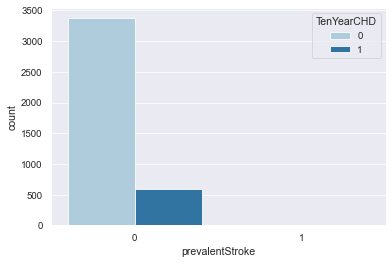

In [746]:
sns.countplot(df['prevalentStroke'],hue = df['TenYearCHD'])

In [747]:
df.drop(['prevalentStroke'] , axis = 1 , inplace = True)

In [748]:
df['prevalentHyp'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

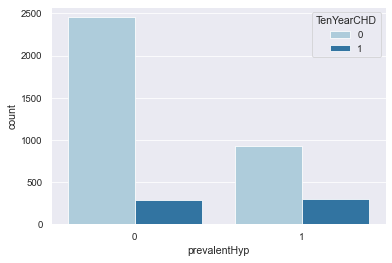

In [749]:
sns.countplot(df['prevalentHyp'] , hue=df['TenYearCHD'])

In [750]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

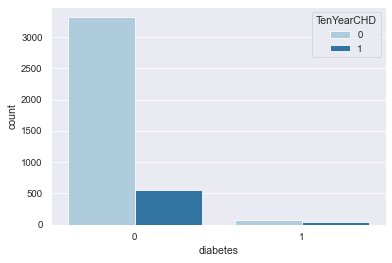

In [751]:
sns.countplot(df['diabetes'] , hue = df['TenYearCHD'])

In [752]:
df.drop(['diabetes'] , axis = 1, inplace = True)

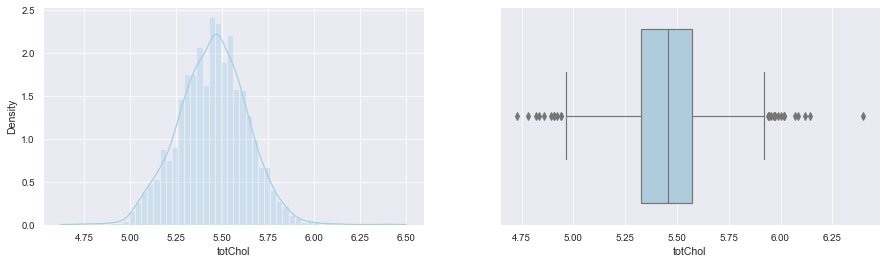

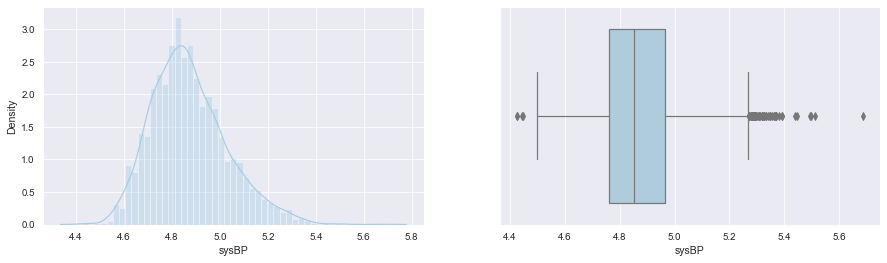

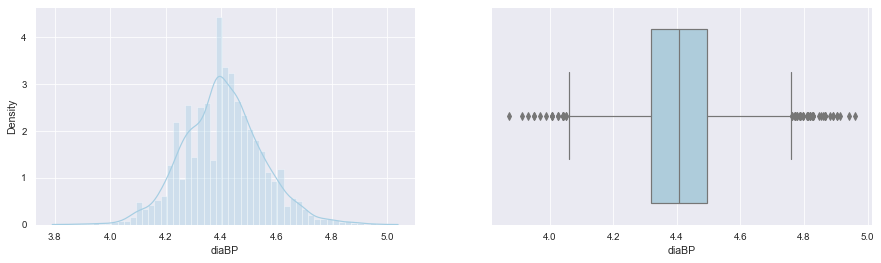

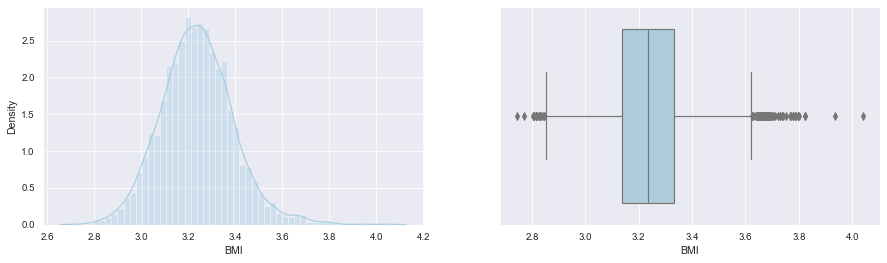

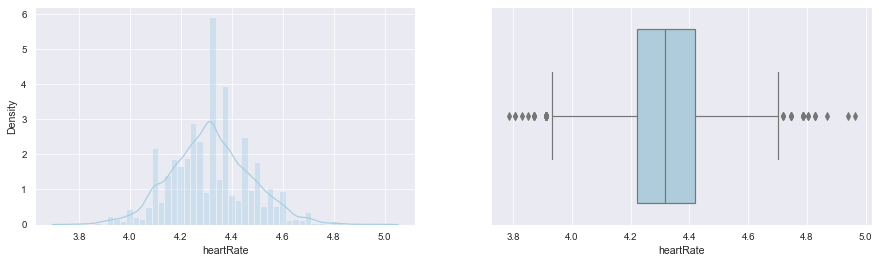

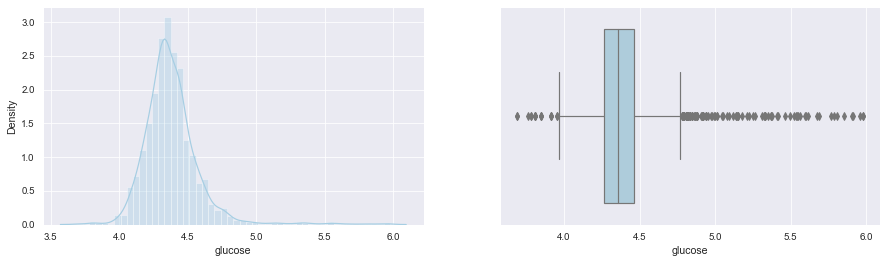

In [753]:
for col in ['totChol' , 'sysBP' , 'diaBP' ,'BMI' , 'heartRate' , 'glucose']:
    fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 4))
    sns.boxplot(np.log(df[col]) , ax = axis[1])
    sns.distplot(np.log(df[col]) , ax = axis[0])

In [754]:
idx = detect_outliers(df , 0 , ['totChol' , 'sysBP' , 'diaBP' ,'BMI' , 'heartRate' , 'glucose'])

In [755]:
df.drop(idx , axis = 0 , inplace = True) 

In [756]:
df.reset_index(inplace = True , drop = True)

In [757]:
num_col = ['age' ,'cigsPerDay', 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate' , 'glucose']

In [758]:
imputer = KNNImputer() 

In [759]:
df[num_col] = imputer.fit_transform(df[num_col])

In [760]:
df.isnull().mean()*100

male             0.0
age              0.0
education        0.0
currentSmoker    0.0
cigsPerDay       0.0
prevalentHyp     0.0
totChol          0.0
sysBP            0.0
diaBP            0.0
BMI              0.0
heartRate        0.0
glucose          0.0
TenYearCHD       0.0
dtype: float64

In [793]:
x = df.drop(['TenYearCHD'] , axis = 1 )
y = df['TenYearCHD']

In [794]:
y.value_counts(normalize = True)

0    0.863974
1    0.136026
Name: TenYearCHD, dtype: float64

In [795]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 7 , 
                                                       stratify = y , test_size = 0.25 , 
                                                      shuffle = True) 

In [796]:
#sm = RandomUnderSampler(random_state = 7)
#sm = SMOTE(random_state = 7) 

In [797]:
#x_train , y_train = sm.fit_resample(x_train , y_train)

In [798]:
sclr = StandardScaler()

In [799]:
x_train[num_col] = sclr.fit_transform(x_train[num_col])

In [800]:
x_test[num_col] = sclr.transform(x_test[num_col])

In [801]:
poly = PolynomialFeatures(degree = 2)

In [802]:
x_train = poly.fit_transform(x_train)

In [803]:
model = LogisticRegression()

In [804]:
model.fit(x_train , y_train)

LogisticRegression()

In [805]:
y_train_pred = model.predict(x_train)

In [806]:
y_test_pred = model.predict(poly.transform(x_test))

In [807]:
accuracy_score(y_true = y_train , y_pred = y_train_pred)

0.8728471967753756

In [808]:
accuracy_score(y_true = y_test , y_pred = y_test_pred)

0.865934065934066